<a href="https://colab.research.google.com/github/ODARI-CHARLES1/ColabNotebooks/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NoteBook for studying statistics using python libraries

![](https://i.pinimg.com/1200x/99/84/13/998413c9f0facaac14b3f85c91e946ec.jpg)

#Datasets to study  
1.  [BMW Global Sales Analysis](!https://www.kaggle.com/datasets/sidraaazam/bmw-global-sales-analysis)


In [3]:
#installing opendataset library
!pip install opendatasets

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import opendatasets as od
import os
from sqlalchemy import create_engine


In [5]:
#importing the data.........
from google.colab import files
uploaded = files.upload()

In [6]:
#using opendataset...
od.download('https://www.kaggle.com/datasets/sidraaazam/bmw-global-sales-analysis')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: odarikibisicharles
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sidraaazam/bmw-global-sales-analysis


100%|██████████| 833k/833k [00:00<00:00, 569MB/s]

In [7]:
#reading the dataset........
df = pd.read_csv('/content/bmw-global-sales-analysis/BMW sales data (2010-2024) (1).csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [8]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [9]:
bins=int(np.log2(df['Year'].count()))
bins

15

In [12]:

#Quartiles.......
listedEngineSale=list(df['Engine_Size_L'])
listedEngineSale.sort()
q1=np.percentile(listedEngineSale,25)
q2=np.percentile(listedEngineSale,50)
q3=np.percentile(listedEngineSale,75)
q1

np.float64(2.4)

In [13]:
#using formula instead of numpy library
'''
by Odari K charles
'''

#first Quartile
pos=(len(df['Engine_Size_L']+1)/4)
pos=int(pos)
listedEngineSale[pos]


2.4

In [14]:
q2

np.float64(3.2)

In [15]:
#second Quartile
pos=(len(df['Engine_Size_L']+1)/2)
pos=int(pos)
listedEngineSale[pos]

3.2

In [16]:
q3

np.float64(4.1)

In [17]:
#third Quartile
pos=(len(df['Engine_Size_L']+1)*3/4)
pos=int(pos)
listedEngineSale[pos]

4.1

#Standard Deviation


In [18]:
np.std(df['Engine_Size_L'])


1.0090683067067723

# Procedure for Constructing a Frequency Distribution Table

Given a dataset of size **n**, the frequency distribution can be constructed systematically as follows:

---

### **Step 1: Determine the Range (R)**
$$
R = X_{max} - X_{min}
$$

Where:  
- ̧\(x_max\)= maximum observation  
- \(X_min\) = minimum observation  

---

### **Step 2: Determine the Number of Classes (k)**
Using **Sturges’ Rule**:  
$$
k = 1 + 3.322 \log_{10}(n)
$$

Round \(k\) to the nearest integer.  

---

### **Step 3: Calculate the Class Interval (i)**
$$
i = \frac{R}{k}
$$

Round \(i\) to a convenient value (usually an integer).  

---

### **Step 4: Establish Class Boundaries**
- Choose a starting point at or slightly below the minimum value.  
- Construct \(k\) intervals of equal width \(i\).  

General notation:  
$$
[L_1, U_1), [L_2, U_2), \ldots, [L_k, U_k)
$$

---

### **Step 5: Tally the Observations**
- Assign each observation to the appropriate class interval.  
- Use tally marks for counting.  

---

### **Step 6: Construct the Frequency Distribution Table**

| Class Interval | Tally | Frequency (f) | Relative Frequency (f/n) | Cumulative Frequency (Σf) |
|----------------|-------|---------------|--------------------------|---------------------------|
| L1 – U1        |       |               |                          |                           |
| L2 – U2        |       |               |                          |                           |
| …              |       |               |                          |                           |
| **Total**      |       | n             | 1.00 (or 100%)           | n                         |


In [19]:
data=df['Engine_Size_L']

Xmin = 1.5
Xmax = 5
n = len(df['Engine_Size_L'])

R = Xmax - Xmin
k = int(round(1 + 3.322 * np.log10(n)))
i = np.ceil(R / k * 10) / 10

print("Frequency Distribution Setup")
print("-------------------------------")
print(f"Minimum Value (Xmin)  = {Xmin}")
print(f"Maximum Value (Xmax)  = {Xmax}")
print(f"Range (R)             = {R}")
print(f"Number of Classes (k) = {k}")
print(f"Class Interval (i)    = {i}")


Frequency Distribution Setup
-------------------------------
Minimum Value (Xmin)  = 1.5
Maximum Value (Xmax)  = 5
Range (R)             = 3.5
Number of Classes (k) = 17
Class Interval (i)    = 0.3


In [20]:
#creating classes
classes=np.arange(data.min(),data.max()+i,i)
classes

array([1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1])

In [21]:
# Step 4: Class intervals
bins = np.arange(data.min(), data.max() + i, i)

# Step 5: Frequency distribution
freq_table = pd.cut(data, bins=bins, right=False).value_counts().sort_index()

# Step 6: Put into DataFrame
table = pd.DataFrame({
    "Class Interval": freq_table.index.astype(str),
    "Frequency": freq_table.values,
})
table["Relative Frequency"] = table["Frequency"] / n
table["Cumulative Frequency"] = table["Frequency"].cumsum()

table


,Class Interval,Frequency,Relative Frequency,Cumulative Frequency
0,"[1.5, 1.8)",3560,0.07120,3560
1,"[1.8, 2.1)",4310,0.08620,7870
2,"[2.1, 2.4)",5671,0.11342,13541
3,"[2.4, 2.7)",2956,0.05912,16497
4,"[2.7, 3.0)",4247,0.08494,20744
5,"[3.0, 3.3)",5700,0.11400,26444
6,"[3.3, 3.6)",4250,0.08500,30694
7,"[3.6, 3.9)",4373,0.08746,35067
8,"[3.9, 4.2)",2839,0.05678,37906
9,"[4.2, 4.5)",4344,0.08688,42250


In [22]:
midpoints=[]
n=len(classes)-1;
n

for x in range(n):
  midpoints.append((classes[x]+classes[x+1])/2);

midpoints=np.array(midpoints)
midpoints
frequency=table['Frequency']


<Axes: title={'center': 'Histogram for engine size'}, ylabel='Frequency'>

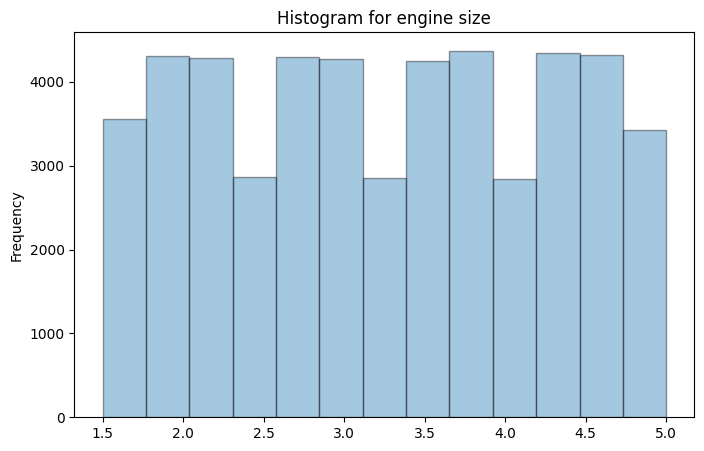

In [55]:
#using pandas to plot histogram
plt.figure(figsize=(8,5))
df['Engine_Size_L'].plot.hist(title="Histogram for engine size",bins=int(np.log2(5000)+1),alpha=0.4,edgecolor='black')


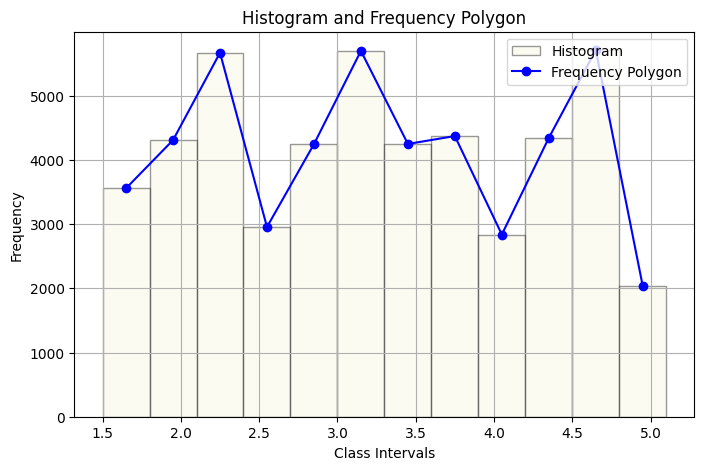

In [58]:

plt.figure(figsize=(8,5))

plt.hist(data, bins=bins, alpha=0.4, color='beige', edgecolor='black', label='Histogram')
plt.plot(midpoints, frequency, marker='o', linestyle='-', color='b', label='Frequency Polygon')
plt.title("Histogram and Frequency Polygon")
plt.xlabel("Class Intervals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

